In [3]:
import polars as pl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tables import delta_yields_table

In [5]:
df_raw = delta_yields_table.collect()
df_raw

date,maturity,delta_yld
date,str,f64
1919-01-31,"""gs3m""",null
1919-02-28,"""gs3m""",null
1919-03-31,"""gs3m""",null
1919-04-30,"""gs3m""",null
1919-05-31,"""gs3m""",null
…,…,…
2024-10-31,"""gs30""",0.34
2024-11-30,"""gs30""",0.16
2024-12-31,"""gs30""",0.04


In [35]:
df = df_raw.pivot(on="maturity", index="date").drop_nulls()
dates = df.get_column("date")
df

date,gs3m,gs6m,gs1,gs2,gs3,gs5,gs7,gs10,gs20,gs30
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1981-10-31,-1.38,-1.3,-1.14,-0.92,-0.72,-0.52,-0.32,-0.17,0.06,0.01
1981-11-30,-2.88,-2.94,-2.97,-2.66,-2.39,-2.03,-1.91,-1.76,-1.57,-1.33
1981-12-31,-0.03,0.32,0.44,0.41,0.55,0.22,0.2,0.33,0.17,0.1
1982-01-31,1.6,1.46,1.47,1.28,0.98,1.05,1.05,0.87,0.84,0.77
1982-02-28,1.36,0.91,0.41,0.25,0.09,-0.11,-0.21,-0.16,-0.09,0.0
…,…,…,…,…,…,…,…,…,…,…
2024-09-30,-0.38,-0.41,-0.4,-0.35,-0.28,-0.21,-0.17,-0.15,-0.15,-0.11
2024-10-31,-0.2,-0.11,0.17,0.35,0.39,0.41,0.39,0.38,0.34,0.34
2024-11-30,-0.1,-0.01,0.13,0.29,0.31,0.32,0.3,0.26,0.19,0.16


In [7]:
X = df.drop("date").to_numpy()
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=3)
scores = pca.fit_transform(Xz)

In [9]:
loadings = pca.components_.T
explained = pca.explained_variance_ratio_

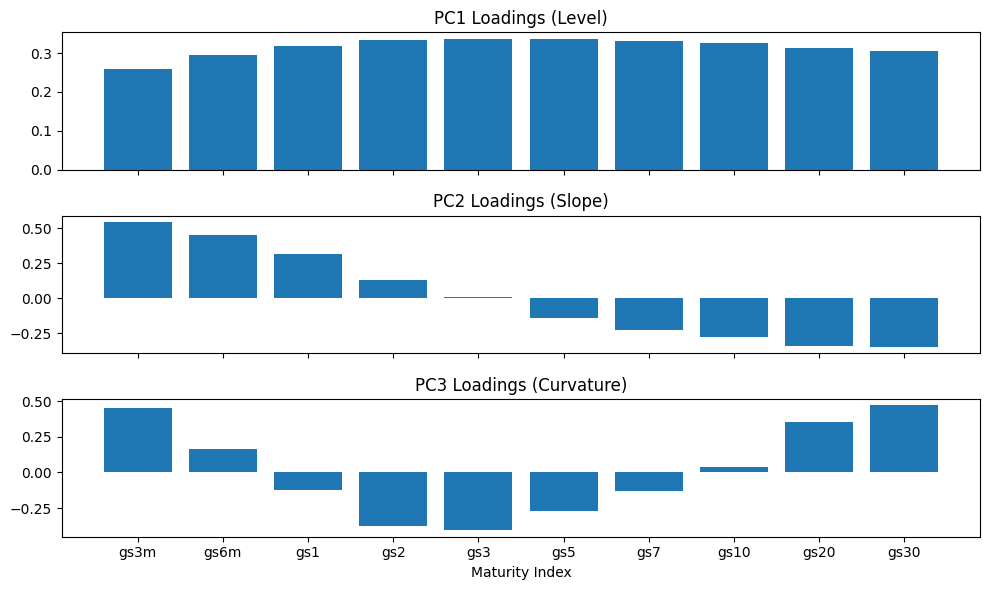

In [29]:
maturities = df.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)

axes[0].bar(maturities, loadings[:, 0])
axes[0].set_title("PC1 Loadings (Level)")

axes[1].bar(maturities, loadings[:, 1])
axes[1].set_title("PC2 Loadings (Slope)")

axes[2].bar(maturities, loadings[:, 2])
axes[2].set_title("PC3 Loadings (Curvature)")

axes[2].set_xlabel("Maturity Index")

plt.tight_layout()
plt.show()

In [30]:
Xz

array([[-4.15039678, -3.98997114, -3.53135754, ..., -0.54330866,
         0.31505417,  0.12104156],
       [-8.7274256 , -9.10924394, -9.31431084, ..., -6.31555913,
        -6.07136755, -5.44213108],
       [-0.03107085,  1.0668715 ,  1.46157482, ...,  1.27186444,
         0.74603968,  0.49468749],
       ...,
       [-0.24466553,  0.03677393,  0.48194885, ...,  1.01774021,
         0.82440069,  0.74378477],
       [-0.64134136, -0.27537685, -0.24487042, ...,  0.18276058,
         0.19751266,  0.24559021],
       [-0.0920979 , -0.11930146, -0.08686623, ...,  0.94513328,
         1.09866419,  1.20046312]], shape=(438, 10))

In [31]:
scores

array([[-6.06268954e+00, -5.11689492e+00,  6.37597336e-01],
       [-2.34343292e+01, -4.90907138e+00, -2.92468050e-01],
       [ 3.19479501e+00,  7.05915506e-02, -1.07312904e+00],
       ...,
       [ 2.37725083e+00, -1.04926696e+00, -7.57375757e-01],
       [ 4.29135651e-03, -8.15478526e-01, -2.09146128e-01],
       [ 1.63948029e+00, -1.42670930e+00,  4.04288964e-01]],
      shape=(438, 3))

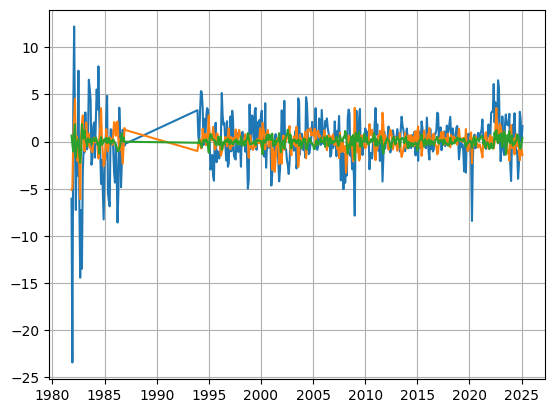

In [37]:
plt.plot(dates, scores)
plt.grid(True)